# Silver Data Load

In this notebook, we will be filtering, cleaning, and augmenting to create the Silver Layer.

This layer brings the data from various sources into an "Enterprise View," allowing for further analysis and allowing us to answer one of our research questions:

> Do certain intake attributes make an animal more likely to be adopted?

For more information on Medallion Architecture, see [Databricks Glossary](https://www.databricks.com/glossary/medallion-architecture) (Databricks, n.d.).

---

> **Note:** This is under the assumption that you have already loaded the data through the [`notebooks/elt/1_bronze.ipynb`](./1_bronze.ipynb).

### References

Databricks. (n.d.). *Medallion Architecture*. Retrieved May 10, 2025, from [https://www.databricks.com/glossary/medallion-architecture](https://www.databricks.com/glossary/medallion-architecture)

In [ ]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 kB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.6/254.6 kB 10.0 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 18.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [85]:
# Path to the bronze data files
BRONZE_PATHS = {
    "aac_intakes_outcomes": "../../data-assets/bronze/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/aac_intakes_outcomes.csv",
    "aac_intakes": "../../data-assets/bronze/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/aac_intakes.csv",
    "aac_outcomes": "../../data-assets/bronze/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/aac_outcomes.csv",
}

### 1. Exploratory Data Analysis (EDA)

#### 1.1 Load the merged dataset

In [73]:
df = pd.read_csv(BRONZE_PATHS["aac_intakes_outcomes"])
print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns from {BRONZE_PATHS['aac_intakes_outcomes']}")
print(df.head())

Loaded 79672 rows and 41 columns from ../../data-assets/bronze/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/aac_intakes_outcomes.csv
  age_upon_outcome animal_id_outcome        date_of_birth outcome_subtype  \
0         10 years           A006100  2007-07-09 00:00:00             NaN   
1          7 years           A006100  2007-07-09 00:00:00             NaN   
2          6 years           A006100  2007-07-09 00:00:00             NaN   
3         10 years           A047759  2004-04-02 00:00:00         Partner   
4         16 years           A134067  1997-10-16 00:00:00             NaN   

      outcome_type sex_upon_outcome  age_upon_outcome_(days)  \
0  Return to Owner    Neutered Male                     3650   
1  Return to Owner    Neutered Male                     2555   
2  Return to Owner    Neutered Male                     2190   
3         Transfer    Neutered Male                     3650   
4  Return to Owner    Neutered Male                     5840   



In [98]:
df.head(10)

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return To Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,2007,7,2017-12,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return To Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,2007,7,2014-12,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return To Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,3,2014,2014-03,Saturday,17,3.0,2007,7,2014-03,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research in Austin (TX),Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2004,4,2014-04,10 years,A047759,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return To Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,1997,10,2013-11,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,12034 Research Blvd in Austin (TX),Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444
5,15 years,A141142,1998-06-01 00:00:00,NaN,Return To Owner,Spayed Female,5475,15.0,"(12.5, 15.0]",2013-11-17 11:40:00,11,2013,2013-11,Sunday,11,1.0,1998,6,2013-11,15 years,A141142,Dog,Labrador Retriever/Pit Bull,Black/White,Austin (TX),Aged,Stray,Spayed Female,1,5475,15.0,"(12.5, 15.0]",2013-11-16 14:46:00,11,2013,2013-11,Saturday,14,1.0,0 days 20:54:00.000000000,0.870833
6,15 years,A163459,1999-10-19 00:00:00,NaN,Return To Owner,Intact Female,5475,15.0,"(12.5, 15.0]",2014-11-14 19:28:00,11,2014,2014-11,Friday,19,1.0,1999,10,2014-11,15 years,A163459,Dog,Miniature Schnauzer Mix,Black/Gray,Ih 35 And 41St St in Austin (TX),Normal,Stray,Intact Female,1,5475,15.0,"(12.5, 15.0]",2014-11-14 15:11:00,11,2014,2014-11,Friday,15,1.0,0 days 04:17:00.000000000,0.178472
7,15 years,A165752,1999-08-18 00:00:00,NaN,Return To Owner,Neutered Male,5475,15.0,"(12.5, 15.0]",2014-09-15 16:35:00,9,2014,2014-09,Monday,16,1.0,1999,8,2014-09,15 years,A165752,Dog,Lhasa Apso Mix,Brown/White,Gatlin Gun Rd And Brodie in Austin (TX),Normal,Stray,Neutered Male,1,5475,15.0,"(12.5, 15.0]",2014-09-15 11:28:00,9,2014,2014-09,Monday,11,1.0,0 days 05:07:00.000000000,0.213194
8,15 years,A178569,1999-03-17 00:00:00,NaN,Return To Owner,Neutered Male,5475,15.0,"(12.5, 15.0]",2014-03-23 15:57:00,3,2014,2014-03,Sunday,15,1.0,1999,3,2014-03,15 years,A178569,Dog,Shetland Sheepdog Mix,White/Black,Austin (TX),Normal,Public Assist,Neutered

#### 1.2 Inspect the structure and provide a summary

In [75]:
# Data types and nulls
df.info()

# summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_upon_outcome            79672 non-null  object 
 1   animal_id_outcome           79672 non-null  object 
 2   date_of_birth               79672 non-null  object 
 3   outcome_subtype             36348 non-null  object 
 4   outcome_type                79662 non-null  object 
 5   sex_upon_outcome            79671 non-null  object 
 6   age_upon_outcome_(days)     79672 non-null  int64  
 7   age_upon_outcome_(years)    79672 non-null  float64
 8   age_upon_outcome_age_group  79672 non-null  object 
 9   outcome_datetime            79672 non-null  object 
 10  outcome_month               79672 non-null  int64  
 11  outcome_year                79672 non-null  int64  
 12  outcome_monthyear           79672 non-null  object 
 13  outcome_weekday             796

,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number,dob_year,dob_month,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days
count,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.0,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000
mean,782.046127,2.142592,6.655425,2015.472563,14.297306,1.126820,2013.254870,6.310310,1.0,769.341701,2.107785,6.584032,2015.436101,13.487022,1.126820,16.757116
std,1058.528519,2.900078,3.414284,1.305944,3.774317,0.456057,3.216517,3.289077,0.0,1056.009040,2.893175,3.366579,1.303157,3.121173,0.456057,41.679359
min,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,1991.000000,1.000000,1.0,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000000
25%,90.000000,0.246575,4.000000,2014.000000,12.000000,1.000000,2012.000000,4.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.000000,1.102083
50%,365.000000,1.000000,7.000000,2015.000000,15.000000,1.000000,2014.000000,6.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,1.000000,4.987153
75%,1095.000000,3.000000,10.000000,2017.000000,17.000000,1.000000,2015.000000,9.000000,1.0,1095.000000,3.000000,10.000000,2017.000000,16.000000,1.000000,13.610764
max,9125.000000,25.000000,12.000000,2018.000000,23.000000,13.000000,2018.000000,12.000000,1.0,9125.000000,25.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444


#### 1.3 Missing values overview

In [80]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values.head(10)

outcome_subtype              43324
outcome_type                    10
sex_upon_outcome                 1
sex_upon_intake                  1
age_upon_outcome                 0
age_upon_intake_age_group        0
found_location                   0
intake_condition                 0
intake_type                      0
count                            0
dtype: int64

**Inerpretation**

- `outcome_subtype` has **43,324 missing values** (more than half of the rows). We will drop this column to focus on high-level outcomes.
- `outcome_type` has only **10 missing**, we can consider dropping these rows or filling with a new category labeled `Unknown`.
- `sex_upon_outcome` and `sex_upon_intake` each have 1 missing; these can either be imputed to "Unknown" or dropped without significant data loss.
- All other key intake/outcome fields have no missing values and are ready for transformation.

#### 1.4 Distribution of key categorical fields

In [81]:
# Get the distribution of outcome types as proportions (percentages)
# Using normalize=True converts counts to proportions that sum to 1.0
# This helps us understand the relative frequency of each outcome type in the dataset
print(df['outcome_type'].value_counts(normalize=True))

# Get the distribution of intake types as proportions (percentages)
# Using normalize=True shows the relative share of each intake type
# This allows us to see which intake methods are most common regardless of dataset size
print(df['intake_type'].value_counts(normalize=True))

outcome_type
Adoption           0.421707
Transfer           0.298750
Return to Owner    0.185672
Euthanasia         0.078381
Died               0.008662
Disposal           0.003816
Rto-Adopt          0.002247
Missing            0.000577
Relocate           0.000188
Name: proportion, dtype: float64
intake_type
Stray                 0.702066
Owner Surrender       0.188623
Public Assist         0.062682
Wildlife              0.043478
Euthanasia Request    0.003150
Name: proportion, dtype: float64


**Inerpretation**

- **Outcome:** Approximately **42.2%** of animals are adopted, making it the most common outcome. Transfers account for **29.9%**, while **Returns to Owner** represnt **18.6%**. **Euthanasia** is **7.8%** of the cases.
- **Intake**: The majority (**70.2%**) of the animals are **strays**, followed by **Owner Surrenders (18.9%)**.



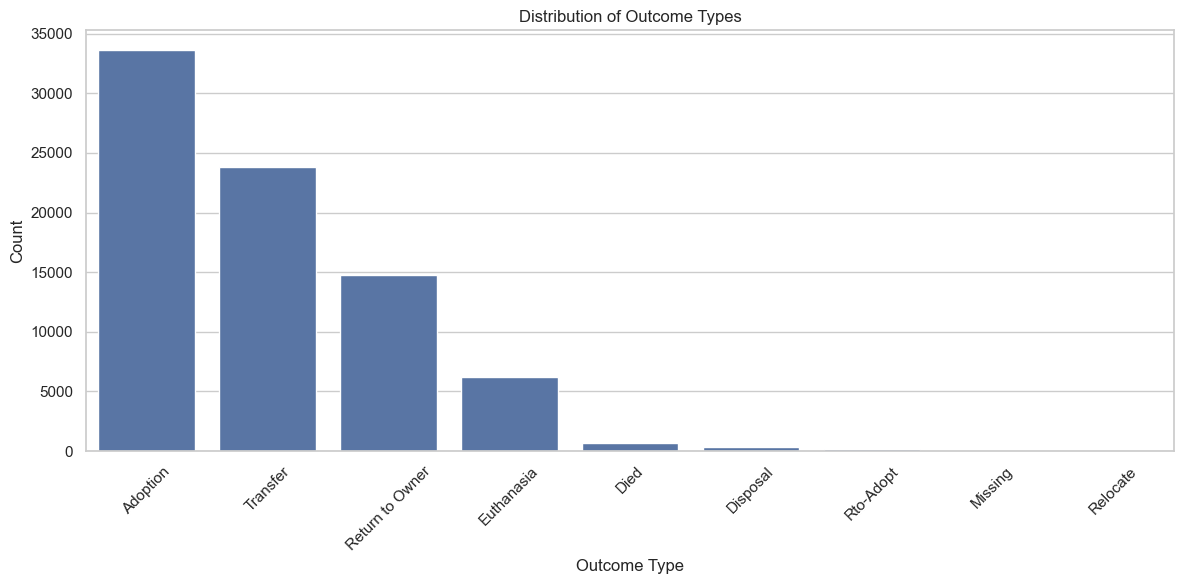

In [87]:
# Visualize with a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='outcome_type', order=df['outcome_type'].value_counts().index)
plt.title('Distribution of Outcome Types')
plt.xlabel('Outcome Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.5 Outcome distribution by intake type and age group

We leverage here:

- `intake_type` which is the source of intake
- `age_upon_intake_age_group` and `age_upon_outcome_age_group` which are predefined buckets for age at both intake and outcome

**1.5.1 By Intake Type**

In [ ]:
# Pivot table used to create distribution of outcomes for each intake_type
outcome_by_intake = pd.crosstab(
    df['intake_type'],
    df['outcome_type'],
    normalize='index'
)
outcome_by_intake

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
intake_type,,,,,,,,,
Euthanasia Request,0.055777,0.011952,0.000000,0.780876,0.000000,0.000000,0.019920,0.000000,0.131474
Owner Surrender,0.596087,0.006122,0.000133,0.040059,0.000532,0.000000,0.053101,0.003127,0.300838
Public Assist,0.125200,0.005208,0.005609,0.048077,0.000200,0.000000,0.667067,0.002404,0.146234
Stray,0.428985,0.008296,0.000501,0.038457,0.000644,0.000072,0.190535,0.002145,0.330365
Wildlife,0.000867,0.030356,0.071119,0.883203,0.000289,0.003180,0.000289,0.000000,0.010697


**1.5.2 By age at intake**

In [92]:
outcome_by_age_intake = pd.crosstab(
    df['age_upon_intake_age_group'],
    df['outcome_type'],
    normalize='index'
)
outcome_by_age_intake

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
age_upon_intake_age_group,,,,,,,,,
"(-0.025, 2.5]",0.456414,0.009768,0.004733,0.077823,0.000655,0.000252,0.120670,0.001813,0.327873
"(10.0, 12.5]",0.253846,0.011538,0.000000,0.121154,0.000000,0.000000,0.416346,0.004808,0.192308
"(12.5, 15.0]",0.171021,0.004751,0.000000,0.156770,0.001188,0.000000,0.486936,0.004751,0.174584
"(15.0, 17.5]",0.096970,0.006061,0.000000,0.193939,0.000000,0.000000,0.581818,0.006061,0.115152
"(17.5, 20.0]",0.075472,0.000000,0.000000,0.283019,0.000000,0.000000,0.547170,0.000000,0.094340
"(2.5, 5.0]",0.342141,0.004268,0.001907,0.076001,0.000272,0.000000,0.349042,0.002906,0.223463
"(20.0, 22.5]",0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.750000,0.000000,0.000000
"(22.5, 25.0]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
"(5.0, 7.5]",0.325248,0.002922,0.000000,0.047341,0.000584,0.000000,0.409410,0.004968,0.209527


**1.5.3 By age at outcome**

In [93]:
outcome_by_age_outcome = pd.crosstab(
    df['age_upon_outcome_age_group'],
    df['outcome_type'],
    normalize='index'
)
outcome_by_age_outcome

outcome_type,Adoption,Died,Disposal,Euthanasia,Missing,Relocate,Return to Owner,Rto-Adopt,Transfer
age_upon_outcome_age_group,,,,,,,,,
"(-0.025, 2.5]",0.456341,0.009797,0.004747,0.077942,0.000657,0.000253,0.120347,0.001818,0.328098
"(10.0, 12.5]",0.259224,0.010407,0.000000,0.119205,0.000000,0.000000,0.410596,0.004730,0.195837
"(12.5, 15.0]",0.180876,0.006912,0.000000,0.155530,0.001152,0.000000,0.478111,0.005760,0.171659
"(15.0, 17.5]",0.102410,0.006024,0.000000,0.198795,0.000000,0.000000,0.572289,0.006024,0.114458
"(17.5, 20.0]",0.074074,0.000000,0.000000,0.277778,0.000000,0.000000,0.555556,0.000000,0.092593
"(2.5, 5.0]",0.342338,0.004156,0.001897,0.075985,0.000271,0.000000,0.348844,0.002801,0.223708
"(20.0, 22.5]",0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.750000,0.000000,0.000000
"(22.5, 25.0]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
"(5.0, 7.5]",0.321648,0.003214,0.000000,0.046743,0.000292,0.000000,0.409874,0.005259,0.212971


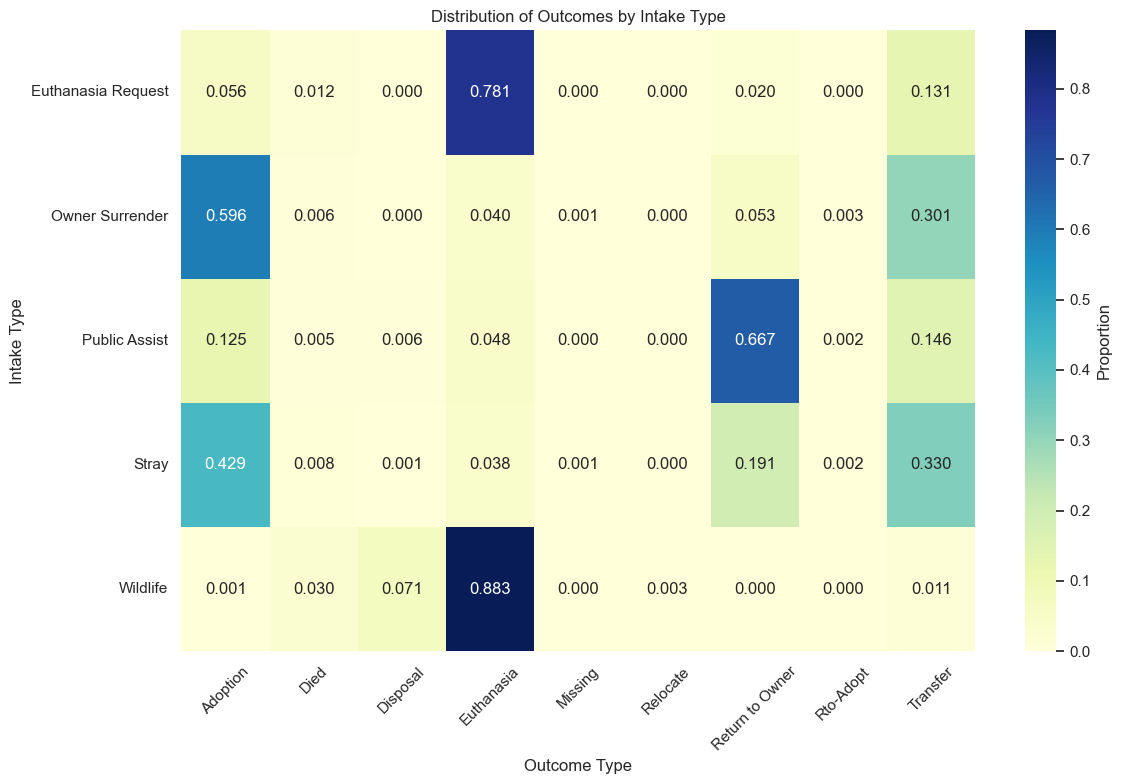

In [99]:
# Create a heatmap to visualize the distribution of outcomes for each intake type
plt.figure(figsize=(12, 8))
sns.heatmap(outcome_by_intake, annot=True, fmt=".3f", cmap='YlGnBu', cbar_kws={'label': 'Proportion'})
plt.title('Distribution of Outcomes by Intake Type')
plt.xlabel('Outcome Type')
plt.ylabel('Intake Type')
plt.xticks(rotation=45)
plt.tight_layout()

### 2. Design Rationale

ADD

### Cleaning and Transformation Steps

**3.1 Handle Duplicate Rows**

In [107]:
# Indentify and drop the exact duplicates (not counting multiple animal visits)
dups = df.duplicated().sum()
print(f"Exact duplicates: {dups}")
if dups > 0:
    df = df.drop_duplicates()

Exact duplicates: 0


`Why?` We want to remove only accidental duplicate rows that potentialy arose during ingestion, not repeat animal visits. Each intake even is uniquely identified by the combination of `animal_id` and `intake_number`.

By checking for these duplicates across all columns, we ensure that we only drop the truly redundant rows. Repreat visits are preseved as seperate records (same `animal_id` but different `intake_number`).

**2.2 Drop and Impute missing fields**

Removing the `outcome_subtype` column cleans up the dataframe.

We also imputate the missing values in `outcome_type`, `sex_upon_intake`, and `sex_upon_outcome` with `Unknown`.

In [108]:
# Drop the column which had high missing values
df = df.drop(columns=['outcome_subtype'])

# Impute small number of missing values with "Unknown"
df['outcome_type'] = df['outcome_type'].fillna('Unknown')
for col in ['sex_upon_intake', 'sex_upon_outcome']:
    df[col] = df[col].fillna('Unknown')

# This is where I am stopping right now

I need to validate that all of the decisions made for cleaning make sense and will be easy to explain. Make sure to download this notebook and review it over time.

Make sure imputing "unknown" is the best idea.

**3.3 Categorical standardization and validation**

In [ ]:
summary = pd.DataFrame({
    "dtype":            df.dtypes.astype(str),
    "missing_count":    df.isnull().sum(),
    "missing_pct":      df.isnull().mean().round(4) * 100,
    "distinct_count":   df.nunique(dropna=False)
})

summary = summary.sort_values("missing_pct", ascending=False)

# show the profile
print(summary)

                              dtype  missing_count  missing_pct  \
outcome_subtype              object          43324        54.38   
outcome_type                 object             10         0.01   
age_upon_outcome             object              0         0.00   
intake_datetime              object              0         0.00   
found_location               object              0         0.00   
intake_condition             object              0         0.00   
intake_type                  object              0         0.00   
sex_upon_intake              object              1         0.00   
count                         int64              0         0.00   
age_upon_intake_(days)        int64              0         0.00   
age_upon_intake_(years)     float64              0         0.00   
age_upon_intake_age_group    object              0         0.00   
intake_month                  int64              0         0.00   
breed                        object              0         0.0

In [ ]:
# First: define all the categorical text fields
cat_cols = [
    'animal_type', 'breed', 'color',
    'intake_type', 'intake_condition',
    'sex_upon_intake', 'sex_upon_outcome',
    'outcome_type'
]

In [133]:
#print unique animal_type
print(df['time_in_shelter_days'].unique())
print(df['time_in_shelter_days'].nunique())
time_in_shelter = df['time_in_shelter_days'].describe()
print(time_in_shelter)

[0.58819444 1.25972222 1.11388889 ... 8.07777778 4.75833333 2.88541667]
29319
count    79637.000000
mean        16.757535
std         41.677628
min          0.000000
25%          1.102778
50%          4.988194
75%         13.648611
max       1606.194444
Name: time_in_shelter_days, dtype: float64


In [134]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,dob_year,dob_month,dob_monthyear,age_upon_intake,animal_id_intake,animal_type,breed,color,found_location,intake_condition,intake_type,sex_upon_intake,count,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days,sex_upon_intake_std
0,10 years,A006100,2007-07-09 00:00:00,Return To Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,12,2017,2017-12,Thursday,0,1.0,2007,7,2017-12,10 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,Colony Creek And Hunters Trace in Austin (TX),Normal,Stray,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194,Neutered Male
1,7 years,A006100,2007-07-09 00:00:00,Return To Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,12,2014,2014-12,Saturday,16,2.0,2007,7,2014-12,7 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research Blvd in Austin (TX),Normal,Public Assist,Neutered Male,1,2555,7.0,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722,Neutered Male
2,6 years,A006100,2007-07-09 00:00:00,Return To Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,3,2014,2014-03,Saturday,17,3.0,2007,7,2014-03,6 years,A006100,Dog,Spinone Italiano Mix,Yellow/White,8700 Research in Austin (TX),Normal,Public Assist,Neutered Male,1,2190,6.0,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889,Neutered Male
3,10 years,A047759,2004-04-02 00:00:00,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,4,2014,2014-04,Monday,15,1.0,2004,4,2014-04,10 years,A047759,Dog,Dachshund,Tricolor,Austin (TX),Normal,Owner Surrender,Neutered Male,1,3650,10.0,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139,Neutered Male
4,16 years,A134067,1997-10-16 00:00:00,Return To Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,11,2013,2013-11,Saturday,11,1.0,1997,10,2013-11,16 years,A134067,Dog,Shetland Sheepdog,Brown/White,12034 Research Blvd in Austin (TX),Injured,Public Assist,Neutered Male,1,5840,16.0,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444,Neutered Male
